In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [11]:
data = pd.read_csv("Laptop.csv")
data.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [12]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.info() #(130,10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               130 non-null    object 
 1   Model               116 non-null    object 
 2   Series              80 non-null     object 
 3   Processor           123 non-null    object 
 4   Processor_Gen       123 non-null    object 
 5   RAM                 122 non-null    float64
 6   Hard_Disk_Capacity  122 non-null    object 
 7   OS                  122 non-null    object 
 8   Rating              130 non-null    float64
 9   Price               130 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 10.3+ KB


In [13]:
data.describe(include="all")

,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
count,130,116,80,123,123,122.000000,122,122,130.000000,130.000000
unique,9,33,28,17,10,NaN,7,7,NaN,NaN
top,DELL,Inspiron,3,i3,11th,NaN,512 GB SSD,Windows 10 Home,NaN,NaN
freq,40,26,17,58,69,NaN,50,46,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,8.622951,NaN,NaN,4.185385,53962.476923
std,NaN,NaN,NaN,NaN,NaN,3.253296,NaN,NaN,0.364960,21369.679452
min,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,2.900000,17640.000000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,4.100000,39052.500000
50%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,4.300000,46940.000000
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,4.400000,61565.000000


In [29]:
nnull = data.isnull()
nnull.sum()
# Better to drop "Series", since it will not be used as a key factor

Brand                  0
Model                 14
Processor              7
Processor_Gen          7
RAM                    8
Hard_Disk_Capacity     8
OS                     8
Rating                 0
Price                  0
dtype: int64

In [15]:
#Additionally drop "Series"
data.drop("Series", axis=1, inplace=True)

In [16]:
#Capitalize Brand name
brands = ['realme', 'acer']
cond = data['Brand'].isin(brands)
data['Brand'][cond] = data['Brand'][cond].str.title()
data['Brand'].unique() # total of 9 brands

array(['DELL', 'ASUS', 'Lenovo', 'HP', 'Acer', 'APPLE', 'MSI', 'Realme',
       'MICROSOFT'], dtype=object)

In [17]:
# Number of Models per Brand
counts = data.groupby(['Brand'])['Model'].count().reset_index()
counts_sort=counts.sort_values(by = 'Model', ascending = False)

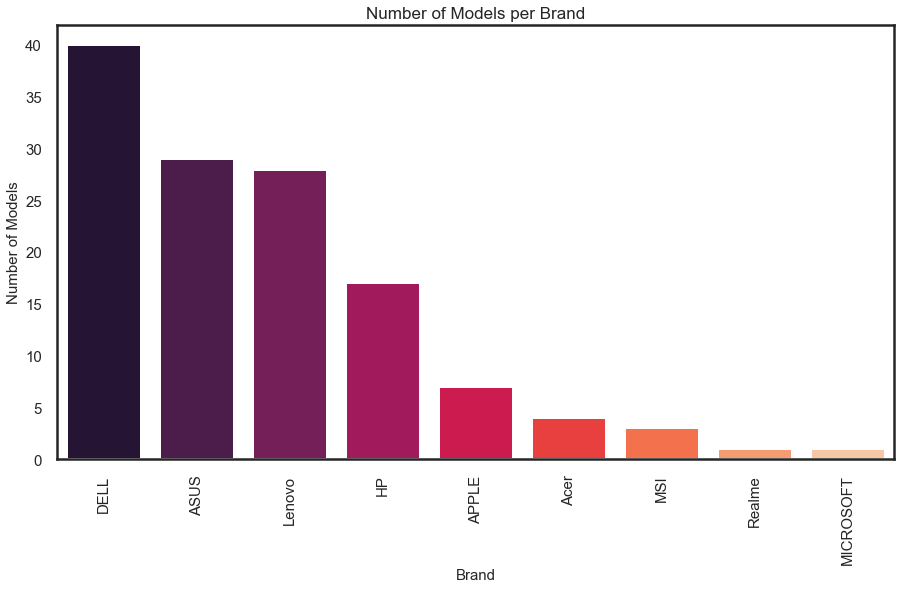

In [18]:
plt.figure(figsize=(15,8))
plt.title("Number of Models per Brand", fontsize = 17)
sns.set_style("white")
sns.set_context("poster")
sns.countplot(x=data['Brand'], order=data['Brand'].value_counts().index, palette='rocket', saturation=1)
plt.xlabel("Brand", fontsize=15)
plt.ylabel("Number of Models", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.show()

# DELL has the most number of models per Brand. 

## Which Brand is most preferred?

In [19]:
data.head()

,Brand,Model,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,DELL,Inspiron,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,DELL,Vostro,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,ASUS,VivoBook,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,DELL,Inspiron,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,ASUS,TUF,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [41]:
ratings = data.groupby(['Brand'])['Rating'].mean()
average_rating_brand = ratings.sort_values(ascending=False).reset_index()
average_rating_brand.rename(columns={'Rating':'Average_Rating'}, inplace=True)
average_rating_brand.style.background_gradient(cmap='mako', subset = "Average_Rating")

,Brand,Average_Rating
0,APPLE,4.585714
1,MICROSOFT,4.500000
2,MSI,4.433333
3,Realme,4.400000
4,HP,4.300000
5,Lenovo,4.239286
6,ASUS,4.237931
7,Acer,4.225000
8,DELL,3.955000


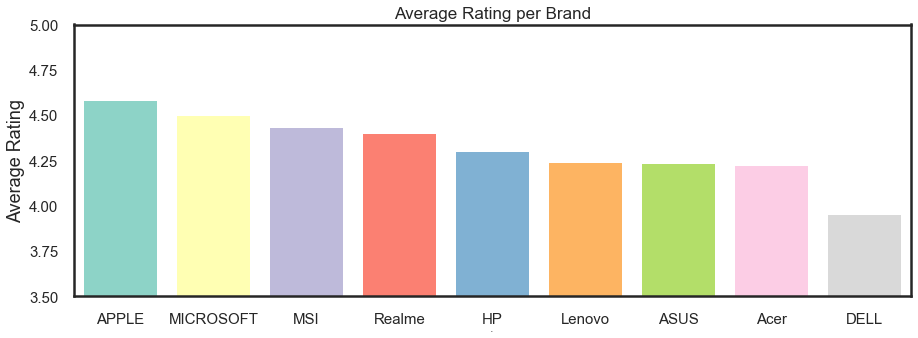

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x = average_rating_brand['Brand'], y=average_rating_brand['Average_Rating'], palette = 'Set3', saturation=1)
plt.title("Average Rating per Brand", fontsize = 17)
plt.xlabel("Brand", fontsize=1)
plt.ylabel("Average Rating", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(3.5,5)
plt.show()

#APPLE Brand has the highest average rating. 
#Therefore, we can assume that "Apple" is the most preferred Brand

## Which Brand is rated most of the times?

In [42]:
data.head()
count_rating_brand = data.groupby(['Brand'])['Rating'].count().sort_values(ascending=False).reset_index()
count_rating_brand.rename(columns = {'Rating':'Rating Count'})
merge_rating = average_rating_brand.merge(count_rating_brand, on = "Brand", how = "inner")
merge_rating # average rating and count rating 
merge_rating.rename(columns= {'Rating':'Rating Count'})
#DELL has the most count of ratings, therefore could be the reason for the low average rating.

,Brand,Average_Rating,Rating Count
0,APPLE,4.585714,7
1,MICROSOFT,4.500000,1
2,MSI,4.433333,3
3,Realme,4.400000,1
4,HP,4.300000,17
5,Lenovo,4.239286,28
6,ASUS,4.237931,29
7,Acer,4.225000,4
8,DELL,3.955000,40


# Rating per Model of each Brand

In [40]:
group_ = data.groupby(['Brand','Model']).Rating.mean().reset_index()
group_.head(10).style.background_gradient(cmap='Set3', subset='Rating')

#Using average of ratings for each model 
#the top 10 includes Apple and Asus

,Brand,Model,Rating
0,APPLE,2020,4.650000
1,APPLE,MacBook,4.500000
2,ASUS,ASUS,4.500000
3,ASUS,Chromebook,3.900000
4,ASUS,ROG,4.600000
5,ASUS,Ryzen,4.400000
6,ASUS,TUF,4.550000
7,ASUS,VivoBook,4.309091
8,ASUS,Vivobook,3.933333
9,ASUS,ZenBook,4.400000


# Relationship between Price vs RAM Size

In [24]:
data['RAM'].value_counts()
# RAM size has three types (4, 8, 16)

8.0     90
16.0    17
4.0     15
Name: RAM, dtype: int64

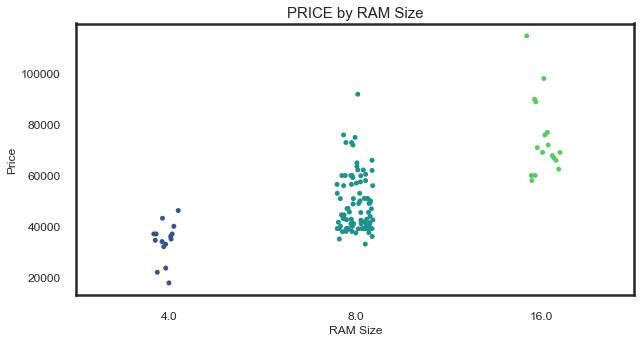

In [25]:
plt.figure(figsize=(10,5))
sns.stripplot(data = data, x = data['RAM'], y = data['Price'], jitter=True, palette = 'viridis');
plt.title("PRICE by RAM Size", fontsize=15);
plt.xlabel("RAM Size", fontsize=12);
plt.ylabel("Price", fontsize=12);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

#From the graph below, we can see that the Price of the Labtop is closely related to the RAM size
#Bigger the RAM Size, higher the price